In [249]:
# loading neccessary library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import matplotlib.colors as mcolors
import statsmodels.api as sm


In [3]:
# loading data
df=pd.read_csv('data\kc_house_data.csv')
df.drop(['id', 'date'],axis=1,inplace=True)


<>:1: SyntaxWarning: invalid escape sequence '\k'
<>:1: SyntaxWarning: invalid escape sequence '\k'
C:\Users\Toan\AppData\Local\Temp\ipykernel_7204\1135123148.py:1: SyntaxWarning: invalid escape sequence '\k'
  df=pd.read_csv('data\kc_house_data.csv')


# Data transformation

In [ ]:
df['log_price']=np.log(df['price'])
df['log_sqft_living']=np.log(df['sqft_living'])

In [184]:
df['renovated_minus']=df['sqft_living15']-df['sqft_living']

In [ ]:
df['log_sqft_basement']=np.log(df['sqft_basement'])

c:\Users\Toan\anaconda3\envs\py2024\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [178]:
df2=df[['price', 'sqft_living', 'sqft_lot'
      , 'sqft_above',
       'sqft_basement',
       'sqft_living15', 'sqft_lot15',]]

# Data exploration

## pairplot chart

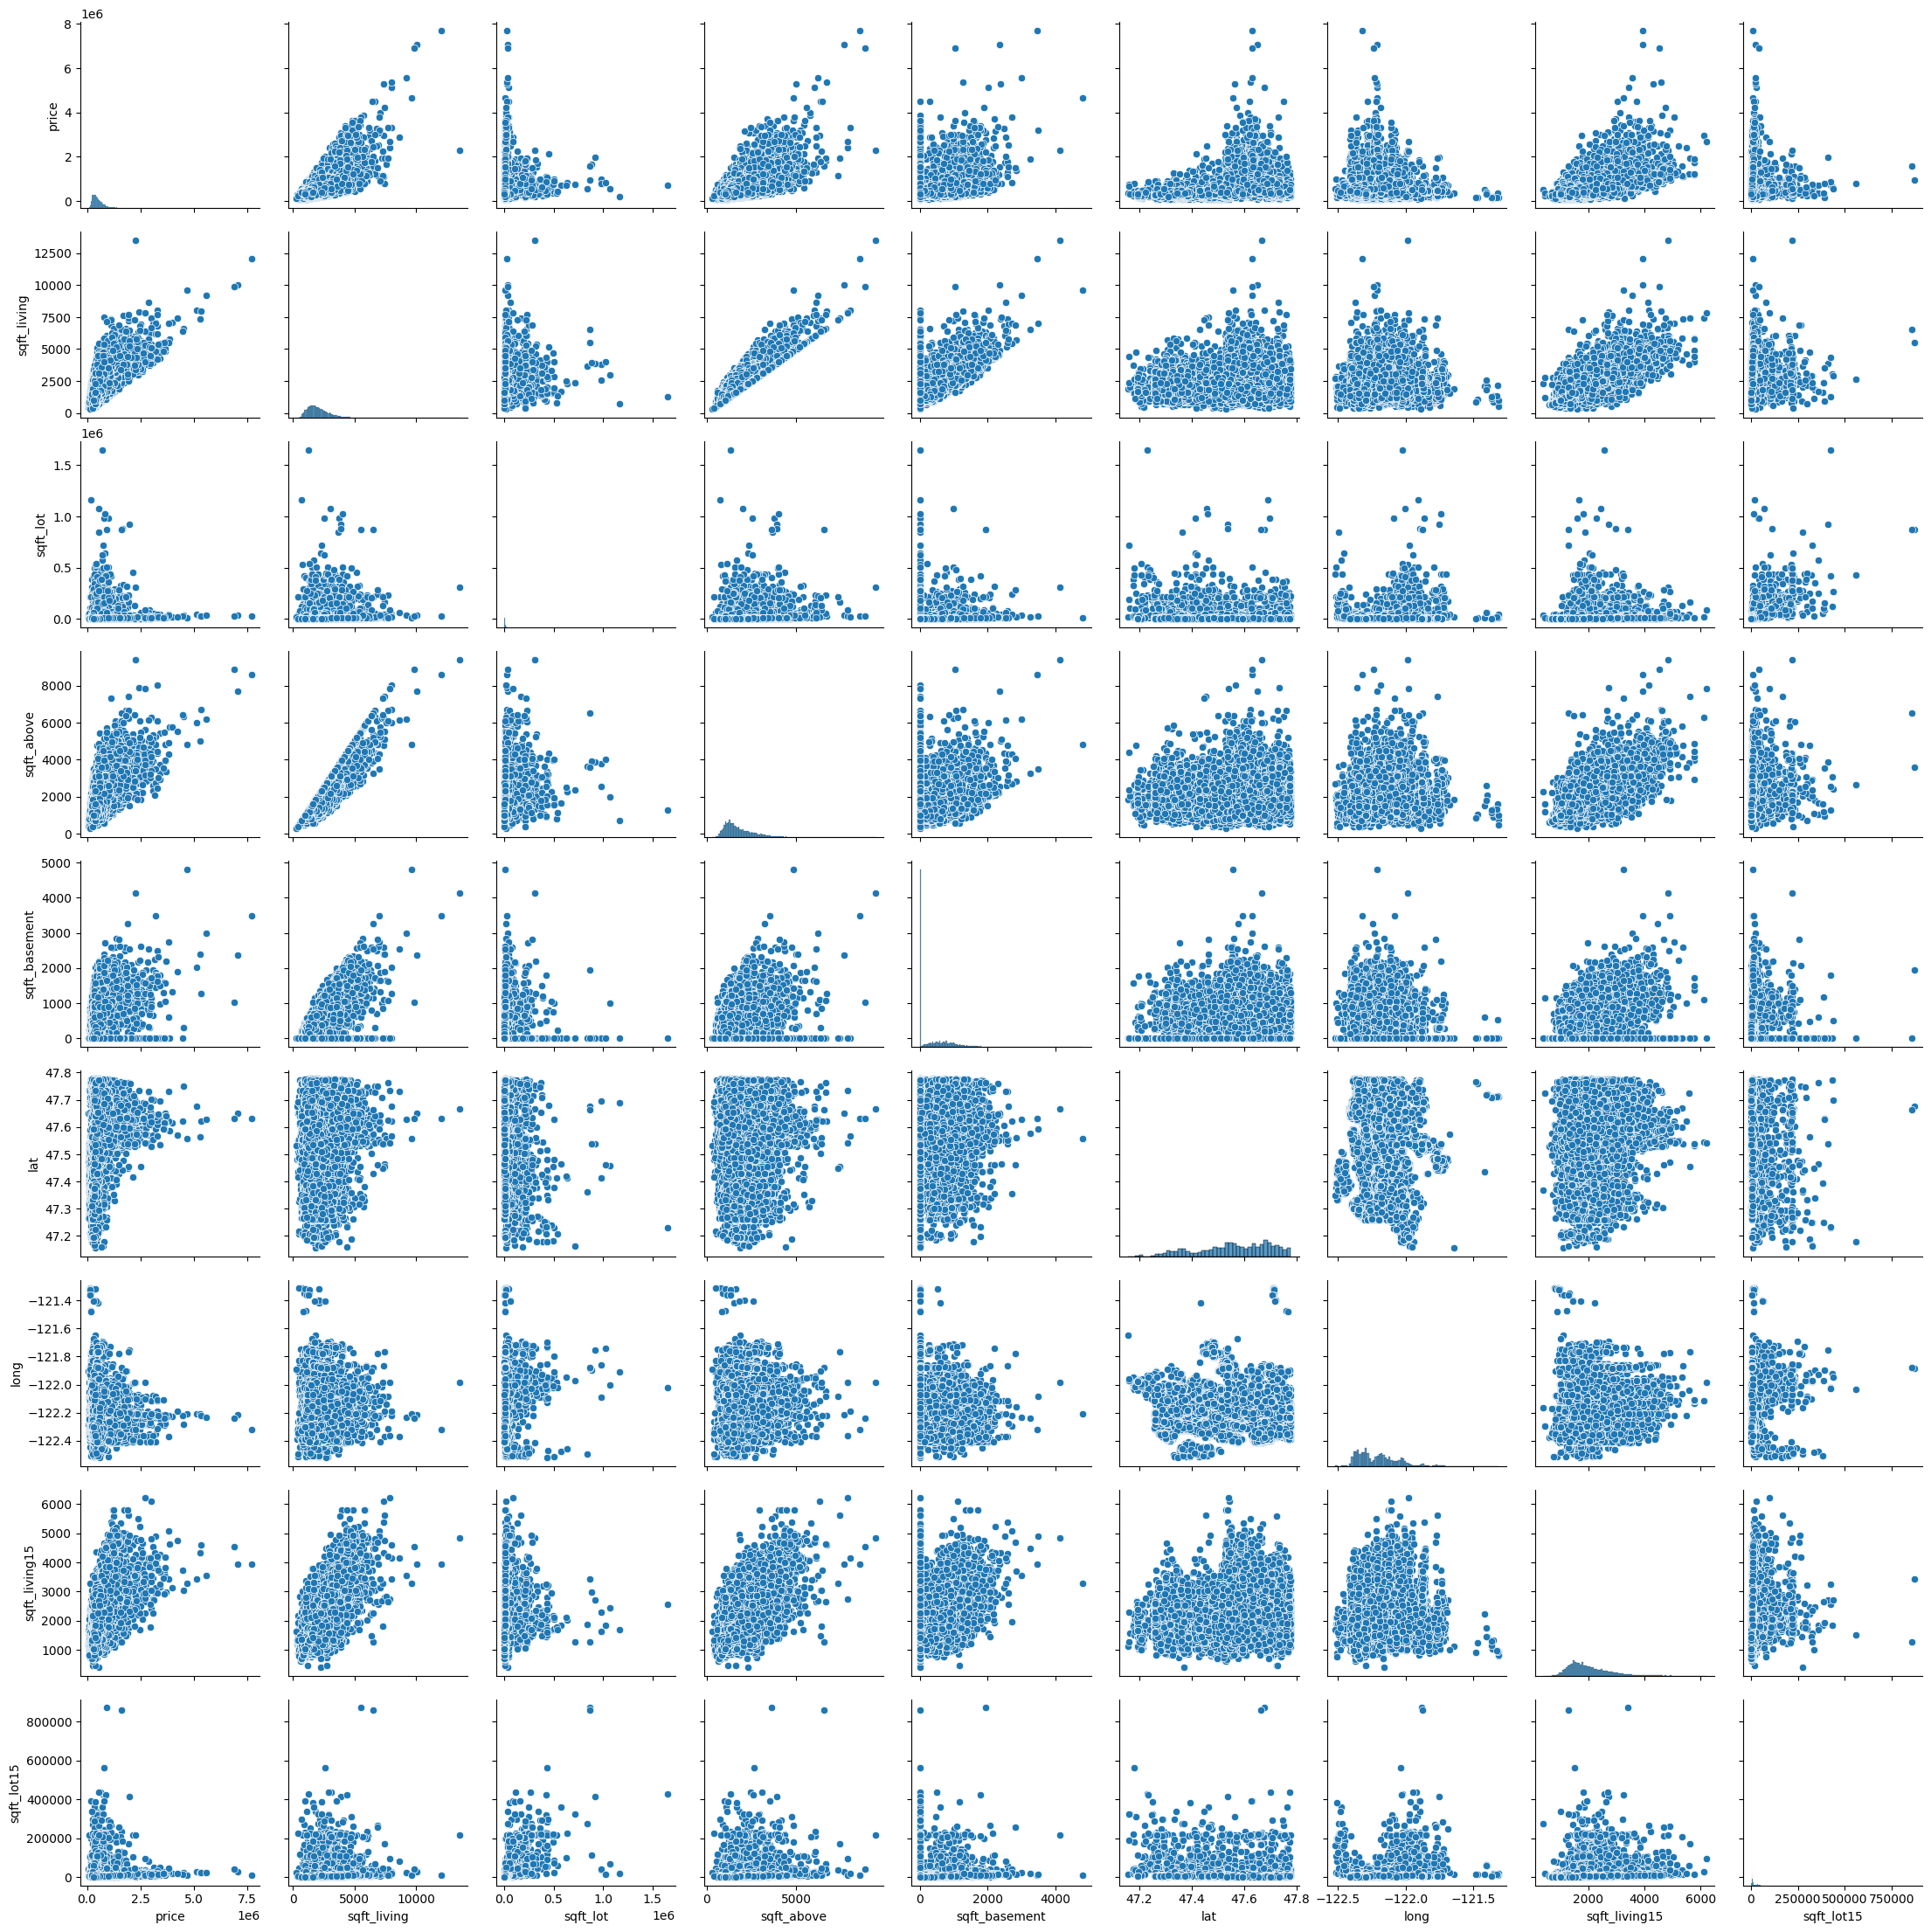

In [7]:
sns.pairplot(df[['price', 'sqft_living', 'sqft_lot'
      , 'sqft_above',
       'sqft_basement', 'lat', 'long',
       'sqft_living15', 'sqft_lot15',]])

## does increase sqft plot size  impact on house price ?

<Axes: xlabel='sqft_increase', ylabel='price'>

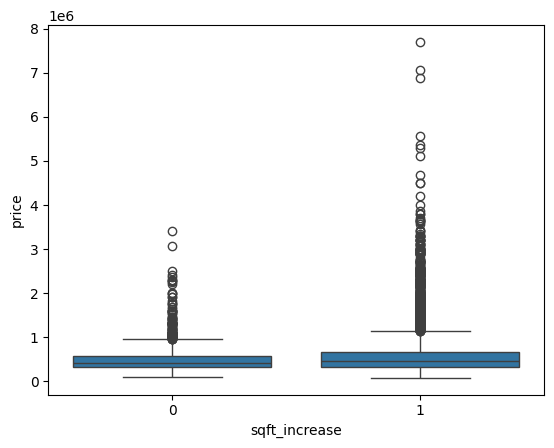

In [241]:
df['sqft_increase']=df['renovated_minus'].apply(lambda x:1 if x!=0 else 0)
sns.boxplot(data=df,x='sqft_increase',y='price')

The renovation means does not impact on house price

In [243]:
df[['price', 'sqft_living', 'sqft_lot'
      , 'sqft_above',
       'sqft_basement', 'lat', 'long',
       'sqft_living15', 'sqft_lot15']].corr()

price  sqft_living  sqft_lot  sqft_above  sqft_basement  \
price          1.000000     0.702035  0.089661    0.605567       0.323816   
sqft_living    0.702035     1.000000  0.172826    0.876597       0.435043   
sqft_lot       0.089661     0.172826  1.000000    0.183512       0.015286   
sqft_above     0.605567     0.876597  0.183512    1.000000      -0.051943   
sqft_basement  0.323816     0.435043  0.015286   -0.051943       1.000000   
lat            0.307003     0.052529 -0.085683   -0.000816       0.110538   
long           0.021626     0.240223  0.229521    0.343803      -0.144765   
sqft_living15  0.585379     0.756420  0.144608    0.731870       0.200355   
sqft_lot15     0.082447     0.183286  0.718557    0.194050       0.017276   

                    lat      long  sqft_living15  sqft_lot15  
price          0.307003  0.021626       0.585379    0.082447  
sqft_living    0.052529  0.240223       0.756420    0.183286  
sqft_lot      -0.085683  0.229521       0.144608    0.718557  
sqft_above    -0.000816  0.343803       0.731870    0.194050  
sqft_basement  0.110538 -0.144765       0.200355    0.017276  
lat            1.000000 -0.135512       0.048858   -0.086419  
long          -0.135512  1.000000       0.334605    0.254451  
sqft_living15  0.048858  0.334605       1.000000    0.183192  
sqft_lot15    -0.086419  0.254451       0.183192    1.000000

**From correlation table,we can see sqft_living ,sqft_Above,sqft_living15 has high correlation with house price.**

# number of bedroom vs log_price 

<Axes: xlabel='bedrooms', ylabel='log_price'>

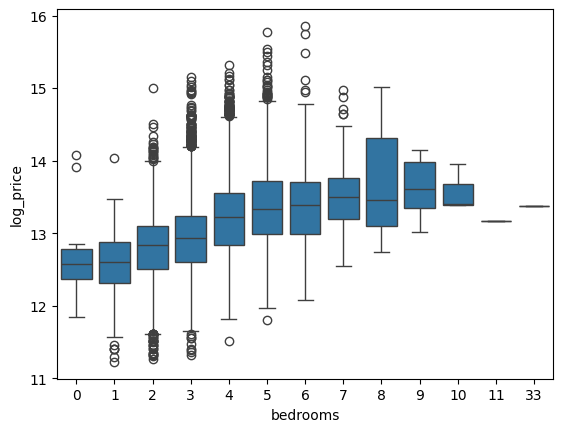

In [12]:
sns.boxplot(data=df,x='bedrooms',y='log_price')

_There is a linear relationship between # bedrooms and log_price._

# bathroom vs log_price

<Axes: xlabel='bathrooms', ylabel='log_price'>

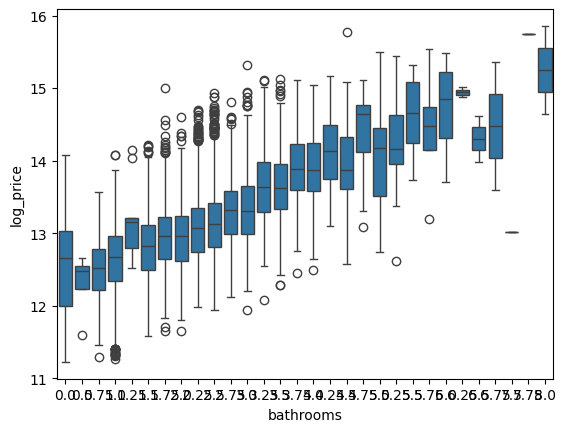

In [13]:
sns.boxplot(data=df,x='bathrooms',y='log_price')

_There is a linear relationship between # bathrooms and log_price._

# floors vs log_price

<Axes: xlabel='floors', ylabel='log_price'>

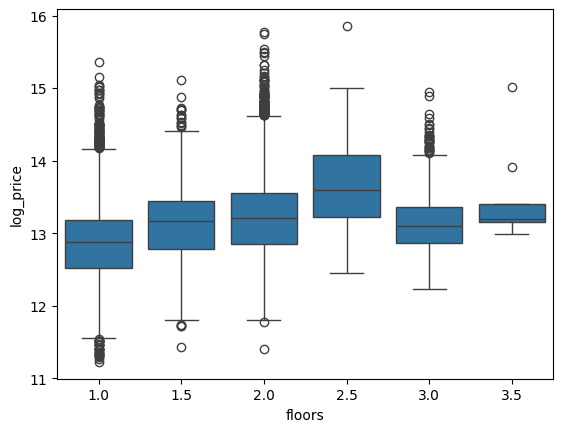

In [14]:
sns.boxplot(data=df,x='floors',y='log_price')

# waterfront vs log_price

<Axes: xlabel='waterfront', ylabel='log_price'>

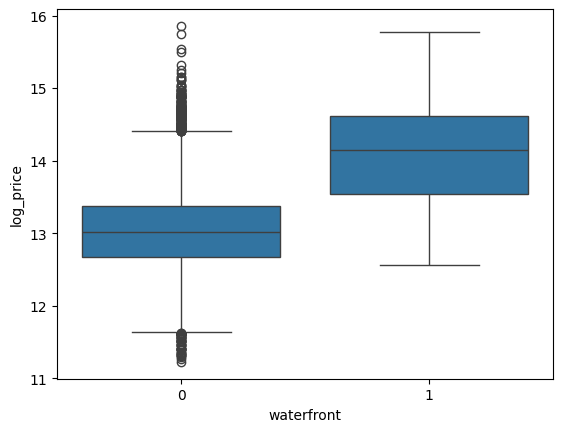

In [15]:
sns.boxplot(data=df,x='waterfront',y='log_price')

_The house have waterfront, its price is more expensive._

<Axes: xlabel='condition', ylabel='log_price'>

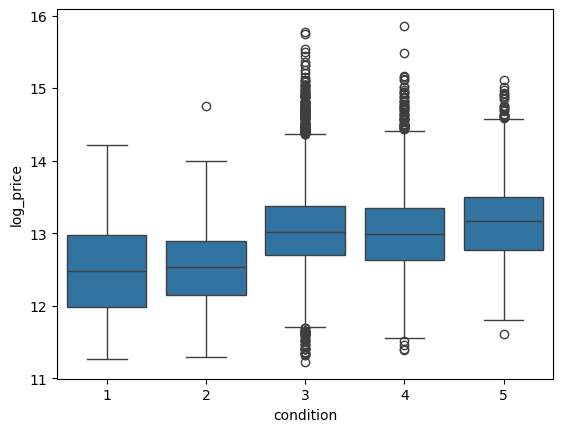

In [44]:
sns.boxplot(data=df,x='condition',y='log_price')

<Axes: xlabel='grade', ylabel='log_price'>

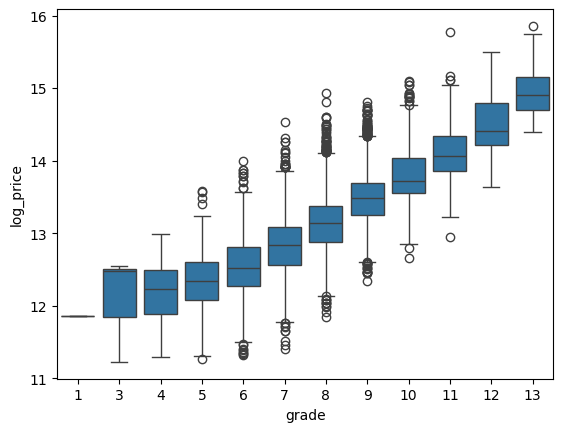

In [47]:
sns.boxplot(data=df,x='grade',y='log_price')

The grade score have bettter linear relationship than condition score, so 
grade scores will be used in our model.

<Axes: xlabel='view', ylabel='log_price'>

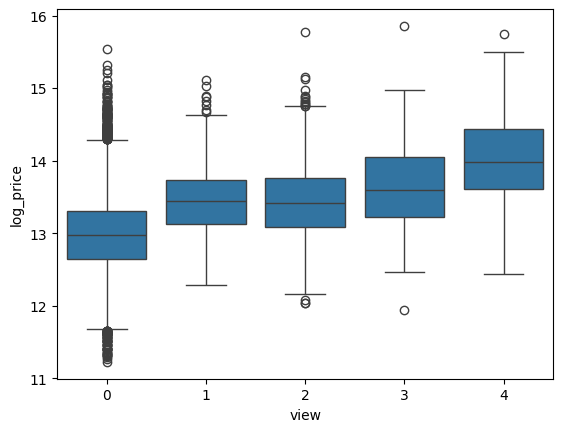

In [161]:
sns.boxplot(data=df,x='view',y='log_price')

View variables does not have any relationship with house prices.

<Axes: xlabel='yr_built', ylabel='log_price'>

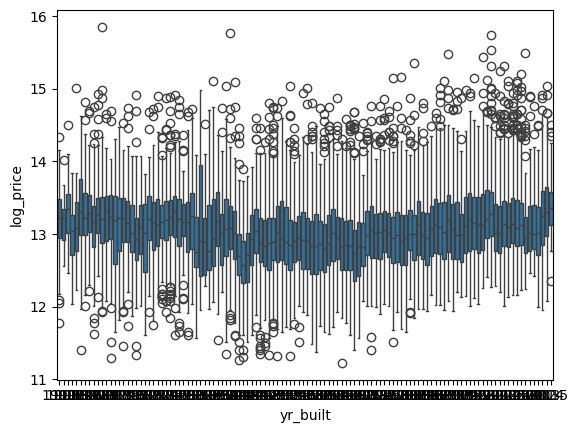

In [175]:
sns.boxplot(data=df,x='yr_built',y='log_price')

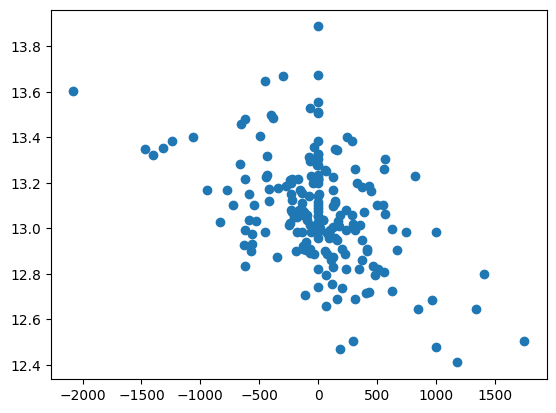

In [250]:
Data1=df[df['zipcode']==98011]
plt.plot(Data1['renovated_minus'],Data1['log_price'],'o')

_Interaction with the zipcode, There is a strong linear relationship between houseprice after renovation.
If sqft_living descreased , the house price is increased._

c:\Users\Toan\anaconda3\envs\py2024\Lib\site-packages\seaborn\regression.py:598: UserWarning: sharex is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


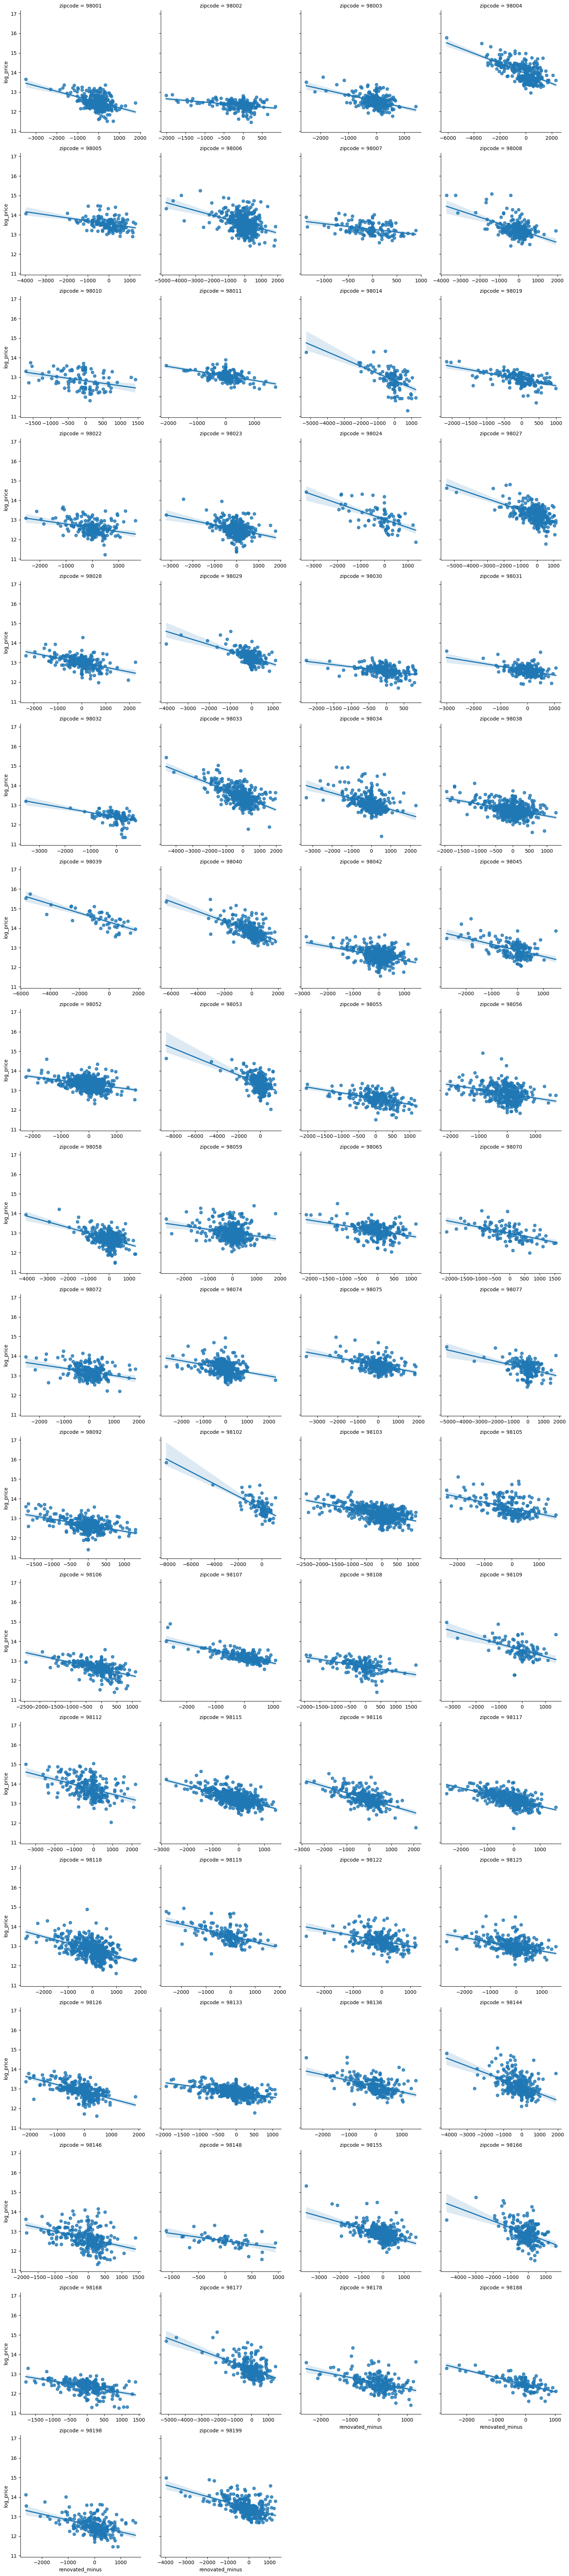

In [251]:
grid = sns.lmplot(x ='renovated_minus', y = "log_price", col = "zipcode", sharex=False, col_wrap = 4, data = df, height=4)

when plotting renovation areas vs log_price on each zipcode, each zipcode has different slope and intercept. Therefore,there is a interaction between zipcode and renovation area changes after renovation.

# density price on map

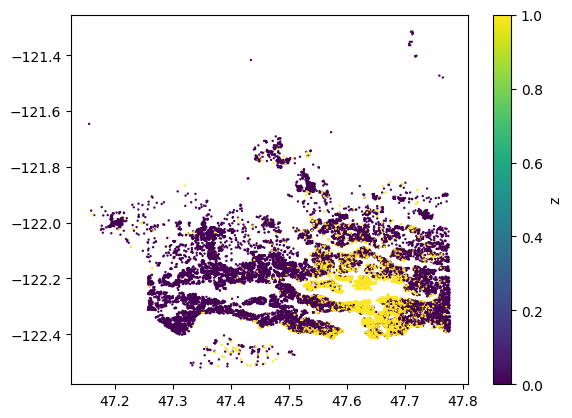

In [252]:
df['price per sqft_living']=df['price']/df['sqft_living']
x=df['lat']
y=df['long']
z=df['price']/df['sqft_living']

z=z.apply(lambda x: 1 if x>300 else 0)
df['down_town_indicator']=z
plt.scatter(x, y, c=z,s=0.5)
plt.colorbar(label='z')
plt.show()

_The price per sqft_living_ is high for area near the center of the city_

In [20]:
agrr=df.groupby('zipcode').agg({'price':'count','down_town_indicator':'sum'})
agrr['downtown percentage']=agrr['down_town_indicator']/agrr['price']
agrr['down_town_indicator_1']=agrr['downtown percentage'].apply(lambda x:2 if x>0.50 else (1 if x>0.07 else 0))

In [21]:
agrr1=agrr['down_town_indicator_1'].reset_index()
df=df.merge(agrr1,on='zipcode')

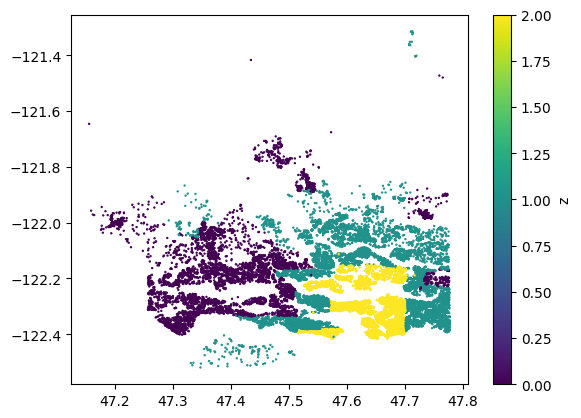

In [22]:
x=df['lat']
y=df['long']
z=df['down_town_indicator_1']
plt.scatter(x, y, c=z,s=0.5)
plt.colorbar(label='z')
plt.show()

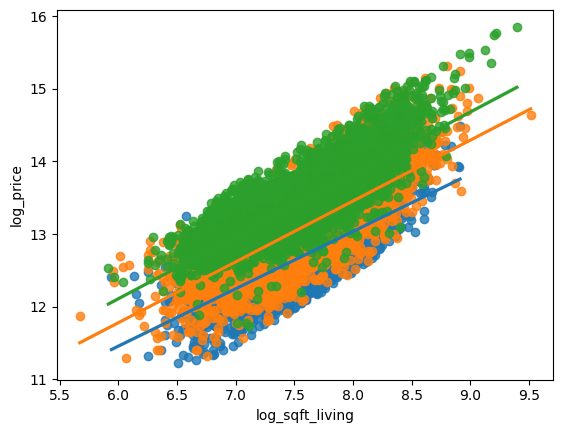

In [23]:
for i in range(0,3):
    df_d=df.groupby('down_town_indicator_1').get_group(i)
    sns.regplot(data=df_d,x='log_sqft_living',y='log_price')
plt.show()

From above graph, there is different linear relationship in different area of house, such as downtown, or near downtown. 


<Axes: xlabel='log_sqft_living', ylabel='log_price'>

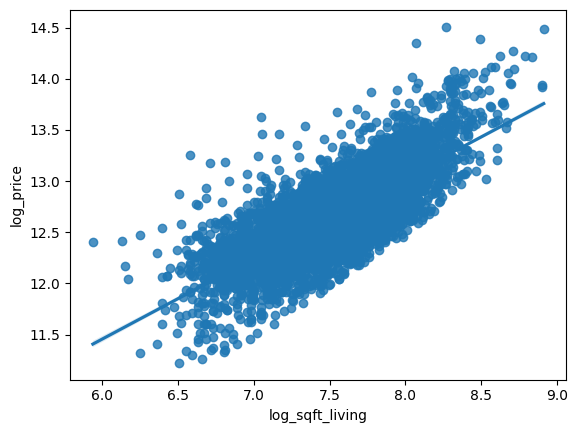

In [24]:
df_d=df.groupby('down_town_indicator_1').get_group(0)
sns.regplot(data=df_d,x='log_sqft_living',y='log_price')

# model developed

In [253]:
# convert zipcode and waterfront columns to category type.
df['zipcode']=df['zipcode'].astype('category')
df['waterfront']=df['waterfront'].astype('category')


In [240]:
m = smf.ols("log_price ~ log_sqft_living:zipcode+zipcode+grade+waterfront+view+renovated_minus:zipcode", data=df).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     685.0
Date:                Sun, 07 Jan 2024   Prob (F-statistic):               0.00
Time:                        20:35:08   Log-Likelihood:                 5369.0
No. Observations:               21613   AIC:                        -1.031e+04
Df Residuals:                   21400   BIC:                            -8612.
Df Model:                         212                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                          7.3475      0.283     25.991      0.000       6.793       7.902
zipcode[T.98002]                   0.6951      0.475      1.462      0.144      -0.237       1.627
zipcode[T.98003]                   0.4204      0.438      0.961      0.337      -0.437       1.278
zipcode[T.98004]                   1.2705      0.407      3.120      0.002       0.472       2.069
zipcode[T.98005]                   1.8587      0.537      3.461      0.001       0.806       2.911
zipcode[T.98006]                   0.5370      0.351      1.530      0.126      -0.151       1.225
zipcode[T.98007]                   0.9874      0.552      1.789      0.074      -0.094       2.069
zipcode[T.98008]                   1.2088      0.446      2.708      0.007       0.334       2.084
zipcode[T.98010]                  -0.2212      0.510     -0.434      0.665      -1.221       0.779
zipcode[T.98011]                   1.9130      0.516      3.704      0.000       0.901       2.925
zipcode[T.98014]                   0.1507      0.447      0.338      0.736      -0.724       1.026
zipcode[T.98019]                   0.9335      0.500      1.867      0.062      -0.046       1.913
zipcode[T.98022]                   0.5509      0.436      1.263      0.207      -0.304       1.406
zipcode[T.98023]                   0.6403      0.351      1.826      0.068      -0.047       1.327
zipcode[T.98024]                   0.6390      0.486      1.316      0.188      -0.313       1.591
zipcode[T.98027]                   0.9634      0.365      2.638      0.008       0.248       1.679
zipcode[T.98028]                   0.7974      0.464      1.718      0.086      -0.112       1.707
zipcode[T.98029]                   0.4938      0.420      1.177      0.239      -0.329       1.316
zipcode[T.98030]                   0.4916      0.496      0.991      0.322      -0.481       1.464
zipcode[T.98031]                   1.1223      0.479      2.345      0.019       0.184       2.061
zipcode[T.98032]                   0.9833      0.538      1.826      0.068      -0.072       2.039
zipcode[T.98033]                   1.2545      0.374      3.350      0.001       0.521       1.988
zipcode[T.98034]                   0.2206      0.364      0.607      0.544      -0.492       0.933
zipcode[T.98038]                   0.1457      0.360      0.404      0.686      -0.560       0.852
zipcode[T.98039]                   1.6511      0.881      1.874      0.061      -0.076       3.378
zipcode[T.98040]                   2.6062      0.472      5.525      0.000       1.682       3.531
zipcode[T.98042]                   0.5843      0.342      1.711      0.087      -0.085       1.254
zipcode[T.98045]                   0.6337      0.412      1.538      0.124      -0.174       1.442
zipcode[T.9805

In [257]:
print(f'Root Mean Squared Error is {np.sqrt(np.mean((np.exp(m.predict())-df['price'])**2))}')
print(f'Mean Absolute Error(MAE) is {np.mean(np.abs(np.exp(m.predict())-df['price']))}')

Root Mean Squared Error is 131451.29154368365
Mean Absolute Error(MAE) is 75531.31579548039


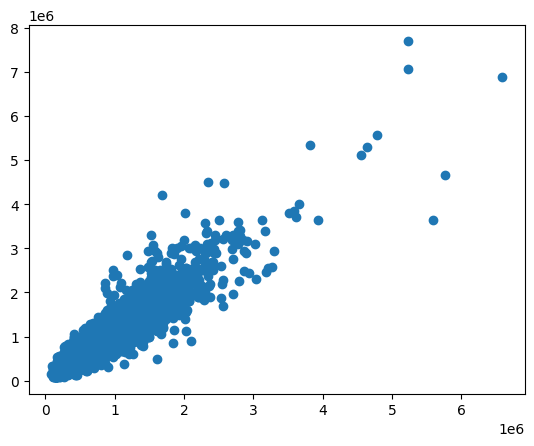

In [235]:
plt.plot(np.exp(m.predict()),df['price'],'o')

Based on the data available, this is the best model, with lowest absolute mean square error, and highest varianc score (0.87)